# 0.   Packages and Functions

In [1]:
!pip install pandas_datareader

In [1]:

#general
import pandas as pd
import numpy as np
import pickle 
from decimal import Decimal


#for dates and times
import random
import time
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar

#prices
import pandas_datareader as web


In [3]:


def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

In [4]:
def weekend2weekday (transactions, col_date, col_day):


  dates2_BUY=list()
  days2_BUY=list()

  for index,row in transactions.iterrows():
    buy_date = datetime.datetime.strptime(row[col_date], "%Y-%m-%d")
    if row[col_day]=='Sat':
      buy_date2 = buy_date - datetime.timedelta(1)
      dates2_BUY.append(buy_date2)

      buy_day2='Fri'
      days2_BUY.append(buy_day2)
    elif row[col_day]=='Sun':
      buy_date = datetime.datetime.strptime(row[col_day], "%Y-%m-%d")
      buy_date2 = buy_date + datetime.timedelta(1)
      dates2_BUY.append(buy_date2)

      buy_day2='Mon'
      days2_BUY.append(buy_day2)
    else:
      buy_date2=row[col_date]
      dates2_BUY.append(buy_date2)
      buy_day2=row[col_day]
      days2_BUY.append(buy_day2)

    transactions['date_BUY_fix']=dates2_BUY
    transactions['day_BUY_fix']=days2_BUY


  return transactions

# 1. Setting investment parameters

## Temporal horizons
 In number of days
 - 1 day to 2 years

In [5]:
horizons=[1,2,3,4,5,6,7,10,15,20,30,40,50,60,70,80,90,100,120,150,180,210,240,270,300,330,360,420,480,540,600,660,720]


## Amounts in dollars
 - 50 to 50,000 dollars

In [6]:
amounts=[50,100,200,300,400,500,1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,50000]

# 2. Data extraction

## Companies' stock prices

In [7]:
#Selecting a list of companies we are interested in analyzing:
companies = ['AAPL',
            'AMZN',
            'MSFT',
            'GOOG',
            'FB',
            'NVDA',
             #automobiles
            'F',
            'GM',
            'HMC',
            'TSLA',
            'TYO',
             'HOG',
             #retail
             'WMT',
             'M',
             'TGT',
             'KSS',
             'COST',
             'BBY',
             #FastMovingConsumerGoods(FMCG)
             'NESN',
             'KO',
             'PEP',
             'ULVR',
             'PG',
             'OR',
            #bank
            'AXP',
            'VISA',
            'SC',
            'DB',
            'UBS',
            'BAC',
            'JPM']

In [8]:
tech_c=['AAPL','AMZN','MSFT','GOOG','FB','VISA','NVDA']
auto_c=['F','GM','HMC','TSLA','TYO','HOG']
retail_c=[ 'WMT', 'M','TGT','KSS','COST','BBY']
fmcg_c=['NESN','KO','PEP','ULVR','PG', 'OR']
bank_c=['AXP','VISA','SC', 'DB', 'UBS','BAC','JPM']

In [9]:
#ESG ratios
ESG_ratios=[16.5, 27.4, 14.7, 22.8, 31.6, 12.9, 29.7, 30.6, 28.5, 31.1, 30.3, 16.3, 27.3, 14.5, 14.8, 12.9, 22.3, 12.0, 28.3, 25.1, 17.6, 23.4, 25.1, 20.5, 19.8, 17.4, 26.9, 30.0, 24.8, 26.3, 27.9]

We are going to extract info from 10 years from the companies selected

In [10]:
#Collecting the data of each company in a list
l_companies_prices=list()
error_companies=list()
error_indexes=list()

for company in companies:
    try:
        prices= web.DataReader(company, data_source='yahoo', start='2010-10-10', end='2020-10-10')
        l_companies_prices.append(prices)
        print(company)
    
    except :
        print('There were  errors when extracting data of  ', company)
        #elimino de la lista esa empresa que no se consiguieron datos.
        error_companies.append(company)
        
        error_company_index=companies.index(company)
        error_indexes.append(error_company_index)


for c in error_companies:
  companies.remove(c)

ESG_ratios_fix=list()

for index in range(0, len(ESG_ratios)):
    if index not in error_indexes:
        ESG_ratios_fix.append(ESG_ratios[index])

AAPL
AMZN
MSFT
GOOG
FB
NVDA
F
GM
HMC
TSLA
TYO
HOG
WMT
M
TGT
KSS
COST
BBY
There were  errors when extracting data of   NESN
KO
PEP
There were  errors when extracting data of   ULVR
PG
OR
AXP
There were  errors when extracting data of   VISA
SC
DB
UBS
BAC
JPM


In [11]:
companies

['AAPL',
 'AMZN',
 'MSFT',
 'GOOG',
 'FB',
 'NVDA',
 'F',
 'GM',
 'HMC',
 'TSLA',
 'TYO',
 'HOG',
 'WMT',
 'M',
 'TGT',
 'KSS',
 'COST',
 'BBY',
 'KO',
 'PEP',
 'PG',
 'OR',
 'AXP',
 'SC',
 'DB',
 'UBS',
 'BAC',
 'JPM']

In [12]:
len(ESG_ratios_fix)

28

In [13]:
len(companies)

28

In [14]:
print(companies[0])
l_companies_prices[0].columns

AAPL


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
company_pos=companies.index("AAPL")
l_companies_prices[company_pos].loc['2010-10-11','Close']

10.54857063293457

# 3. Random transactions

In [16]:
transactions=pd.DataFrame()
#we do 40,000 initial transactions

#id
transactions['id']=range(1,40001)

## Companies

In [17]:
#random company
transactions["company"]=np.random.choice(companies, size=len(transactions))

## Sector

In [18]:
#sector of the company

random_companies=transactions['company'].tolist()
random_sectors=list()
for comp in random_companies:
    if comp in tech_c:
        sector='TECH'
    elif comp in auto_c:
        sector='AUTO'
    elif comp in retail_c:
        sector='RETAIL'
    elif comp in fmcg_c:
        sector='FMCG'
    elif comp in bank_c:
        sector='BANK'
    
    random_sectors.append(sector)

transactions['sector']=random_sectors


## Horizons

In [19]:
#random horizon
transactions["horizon"] = np.random.choice(horizons, size=len(transactions))


## Investment Amounts

In [20]:
#random investment amount
transactions["amount"] = np.random.choice(amounts, size=len(transactions))


## Dates - BUY

In [21]:
#random buy date
start='2013-10-10'
end='2018-10-10'

dates_buy=list()

for i in range(0, transactions.shape[0]):
    r_date=random_date(start,end,random.random())
    dates_buy.append(r_date)


print(len(dates_buy))
transactions['date_BUY']=dates_buy

40000


### Fixing dates (BUY)

In [22]:
day_names=list()

for d in dates_buy:

  dt = datetime.datetime.strptime(d, '%Y-%m-%d')
  weekno=dt.weekday()

  if weekno == 0:
    dia='Mon'
    day_names.append(dia)
  elif weekno==1:
    dia='Tue'
    day_names.append(dia)
  elif weekno==2:
    dia='Wed'
    day_names.append(dia)
  elif weekno==3:
    dia='Thu'
    day_names.append(dia)
  elif weekno==4:
    dia='Fri'
    day_names.append(dia)
  elif weekno==5:
    dia='Sat'
    day_names.append(dia)
  elif weekno==6:
    dia='Sun'
    day_names.append(dia)

transactions['day_BUY']=day_names


In [23]:
dates2_BUY=list()
days2_BUY=list()

#if date is saturday, we are going to push it to friday
#if date is sunday, we are going to push it to monday

for index,row in transactions.iterrows():
  buy_date = datetime.datetime.strptime(row['date_BUY'], "%Y-%m-%d")
  if row['day_BUY']=='Sat':
    buy_date2 = buy_date - datetime.timedelta(1)
    dates2_BUY.append(buy_date2)

    buy_day2='Fri'
    days2_BUY.append(buy_day2)
  elif row['day_BUY']=='Sun':
    buy_date = datetime.datetime.strptime(row['date_BUY'], "%Y-%m-%d")
    buy_date2 = buy_date + datetime.timedelta(1)
    dates2_BUY.append(buy_date2)

    buy_day2='Mon'
    days2_BUY.append(buy_day2)
  else:
    buy_date2=buy_date
    dates2_BUY.append(buy_date2)
    buy_day2=row['day_BUY']
    days2_BUY.append(buy_day2)


transactions['date_BUY_fix']=dates2_BUY
transactions['day_BUY_fix']=days2_BUY

# transactions=weekend2weekday(transactions,'date_BUY','day_BUY' )

In [24]:
#checking for holidays (NYSE is closed)

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2010-10-10', end='2020-10-10').to_pydatetime()
# if datetime.datetime(2014,01,01) in holidays:
#     print True 

l_holidays=list()
for d in dates2_BUY:
  if d in holidays:
    holiday='Holiday'
    l_holidays.append(holiday)

  else:
    holiday=''
    l_holidays.append(holiday)

transactions['holiday_BUY']=l_holidays

In [25]:
transactions_h=transactions[transactions.holiday_BUY=='Holiday']

transactions=transactions[transactions.holiday_BUY!='Holiday']

In [26]:

l_volatilities = []
for company in companies:
    company_pos=companies.index(company)
    df_company_prices = pd.DataFrame(l_companies_prices[company_pos])
    log_ret = np.log(df_company_prices['Close'] / df_company_prices['Close'].shift(1))
    volatility = log_ret.rolling(window=252).std() * np.sqrt(252)
    df_company_prices.insert(2, "Volatility", volatility, True)
    l_volatilities.append(df_company_prices)

print(l_volatilities)

2  
2010-10-14   9213600.0  16.657616  
2010-10-15   6672800.0  16.754620  
...                ...        ...  
2020-10-05  14631000.0   6.060000  
2020-10-06  22708200.0   5.810000  
2020-10-07  17965500.0   5.960000  
2020-10-08  21298800.0   6.290000  
2020-10-09  19317400.0   6.230000  

[2518 rows x 7 columns],                   High         Low  Volatility        Open       Close  \
Date                                                                     
2010-10-11   55.000000   54.240002         NaN   54.299999   54.849998   
2010-10-12   54.910000   54.470001         NaN   54.869999   54.740002   
2010-10-13   55.080002   54.349998         NaN   54.689999   54.419998   
2010-10-14   54.619999   53.520000         NaN   54.459999   54.070000   
2010-10-15   54.590000   53.970001         NaN   54.400002   54.330002   
...                ...         ...         ...         ...         ...   
2020-10-05  162.309998  159.990005    0.391384  159.990005  161.490005   
2020-10-06  161.

In [27]:
l_returns = []
for company in companies:
    company_pos=companies.index(company)
    df_company_prices = pd.DataFrame(l_companies_prices[company_pos])
    returns = (df_company_prices['Close'] - df_company_prices['Close'].shift(1)) / df_company_prices['Close'].shift(1)
    df_company_prices.insert(2, "returns", returns, True)
    l_returns.append(df_company_prices)

In [28]:
l_returns

3.240002  51.970001  0.016052         NaN  52.810001  53.169998   
 ...               ...        ...       ...         ...        ...        ...   
 2020-10-05  20.750000  20.049999  0.023046    0.924426  20.330000  20.420000   
 2020-10-06  20.750000  19.360001 -0.045544    0.925006  20.750000  19.490000   
 2020-10-07  20.740000  19.830000  0.059005    0.927001  19.830000  20.639999   
 2020-10-08  21.900000  20.719999  0.060562    0.928778  20.870001  21.889999   
 2020-10-09  22.240000  21.430000 -0.016446    0.928351  22.000000  21.530001   
 
                Volume  Adj Close  
 Date                              
 2010-10-11  2392500.0  37.662571  
 2010-10-12  2589000.0  37.592255  
 2010-10-13  3001500.0  37.275810  
 2010-10-14  5694400.0  36.797657  
 2010-10-15  4613400.0  37.388332  
 ...               ...        ...  
 2020-10-05  6275500.0  20.420000  
 2020-10-06  7438600.0  19.490000  
 2020-10-07  6694300.0  20.639999  
 2020-10-08  8074000.0  21.889999  
 2020-10-09  

In [29]:
l_yearly_returns = []
for company in companies:
    company_pos=companies.index(company)
    df_company_prices = pd.DataFrame(l_companies_prices[company_pos])
    try:
        df_yearly = df_company_prices["Close"].resample('Y').first().pct_change()
        
        yearly_mean = df_yearly.mean()
    except:
        print( company)
        print(df_company_prices)
        yearly_mean = 0
    l_yearly_returns.append([company,yearly_mean])
print(l_yearly_returns)

[['AAPL', 0.24576212706845474], ['AMZN', 0.32878772362638664], ['MSFT', 0.21823741952413256], ['GOOG', 0.191378431933231], ['FB', 0.30161872761801845], ['NVDA', 0.4931171561846849], ['F', -0.011976915482311935], ['GM', 0.04088241949150044], ['HMC', -0.009170559827996482], ['TSLA', 0.5157369284319866], ['TYO', -0.10592633571589997], ['HOG', 0.044568829075491104], ['WMT', 0.09703322358290575], ['M', 0.008681139192578402], ['TGT', 0.11412148248236709], ['KSS', 0.006854575724160139], ['COST', 0.1674207351165724], ['BBY', 0.2622984487062406], ['KO', 0.06441514580167561], ['PEP', 0.07940352791222091], ['PG', 0.07725201668740694], ['OR', -0.06175039426047935], ['AXP', 0.14723187952081127], ['SC', 0.011489650389287712], ['DB', -0.14093138981130585], ['UBS', -0.0394967250395171], ['BAC', 0.18910217427914794], ['JPM', 0.15206171805688737]]


## Prices - BUY

In [30]:
#price when bought

l_buy_prices=list()
l_volatility=list()
for index,row in transactions.iterrows():
  comp=row['company']
  buy_date=row['date_BUY_fix']
  company_pos=companies.index(comp)
  try:
    price=l_companies_prices[company_pos].loc[buy_date,'Adj Close']
    volatility= l_volatilities[company_pos].loc[buy_date, 'Volatility']
  except :
    price=0
    

  l_buy_prices.append(price)

transactions['price_BUY']=l_buy_prices


In [31]:
l_volatility_buy=list()
for index,row in transactions.iterrows():
  comp=row['company']
  buy_date=row['date_BUY_fix']
  company_pos=companies.index(comp)
  try:
    volatility= l_volatilities[company_pos].loc[buy_date, 'Volatility']
  except :
    volatility=0
  l_volatility_buy.append(volatility)
print(len(l_volatility_buy))


transactions['Volatility_Buy'] = l_volatility_buy

38086


## Dates - SELL

In [32]:
#random sell date
dates_SELL=list()
expected_return = list()

for index,row in transactions.iterrows():
  comp=row['company']
  company_pos=companies.index(comp)
  buy_date = row['date_BUY_fix']
  sell_date = buy_date + datetime.timedelta(row['horizon'])
  expected_return.append(row['horizon']/365 * l_yearly_returns[company_pos][1])
  
  dates_SELL.append(sell_date)

transactions['expected_return (yearly)'] = expected_return
transactions['date_SELL']=dates_SELL

### Fixing dates (SELL)

In [33]:
day_names=list()



for d in dates_SELL:

  # dt = datetime.datetime.strptime(d, '%Y-%m-%d')
  weekno=d.weekday()

  if weekno == 0:
    dia='Mon'
    day_names.append(dia)
  elif weekno==1:
    dia='Tue'
    day_names.append(dia)
  elif weekno==2:
    dia='Wed'
    day_names.append(dia)
  elif weekno==3:
    dia='Thu'
    day_names.append(dia)
  elif weekno==4:
    dia='Fri'
    day_names.append(dia)
  elif weekno==5:
    dia='Sat'
    day_names.append(dia)
  elif weekno==6:
    dia='Sun'
    day_names.append(dia)

transactions['day_SELL']=day_names


In [34]:
dates2_SELL=list()
days2_SELL=list()

#if date is saturday, we are going to push it to friday
#if date is sunday, we are going to push it to monday

for index,row in transactions.iterrows():
  SELL_date = row['date_SELL']
  if row['day_SELL']=='Sat':
    SELL_date2 = SELL_date - datetime.timedelta(1)
    dates2_SELL.append(SELL_date2)

    SELL_day2='Fri'
    days2_SELL.append(SELL_day2)
  elif row['day_SELL']=='Sun':
    SELL_date = row['date_SELL']
    SELL_date2 = SELL_date + datetime.timedelta(1)
    dates2_SELL.append(SELL_date2)

    SELL_day2='Mon'
    days2_SELL.append(SELL_day2)
  else:
    SELL_date2=SELL_date
    dates2_SELL.append(SELL_date2)
    SELL_day2=row['day_SELL']
    days2_SELL.append(SELL_day2)


transactions['date_SELL_fix']=dates2_SELL
transactions['day_SELL_fix']=days2_SELL

# transactions=weekend2weekday(transactions,'date_BUY','day_BUY' )

In [35]:
l_sharpe=list()
for index,row in transactions.iterrows():
  comp=row['company']
  buy_date=row['date_BUY_fix']
  company_pos=companies.index(comp)
  r = l_returns
  try:
    df_company_returns = pd.DataFrame(l_returns[company_pos])
    r=df_company_returns["returns"]
    sr = r.mean()/r.std() * np.sqrt(252)
    sr= l_volatilities[company_pos].loc[buy_date, 'Volatility']
  except :
    sr=0
  l_sharpe.append(sr)
print(len(l_sharpe))


transactions['Sharpe Ratio'] = l_sharpe

38086


In [36]:
transactions

,id,company,sector,horizon,amount,date_BUY,day_BUY,date_BUY_fix,day_BUY_fix,holiday_BUY,price_BUY,Volatility_Buy,expected_return (yearly),date_SELL,day_SELL,date_SELL_fix,day_SELL_fix,Sharpe Ratio
0,1,COST,RETAIL,6,50,2014-08-20,Wed,2014-08-20,Wed,,102.729012,0.140189,0.002752,2014-08-26,Tue,2014-08-26,Tue,0.140189
1,2,NVDA,TECH,20,50000,2017-07-13,Thu,2017-07-13,Thu,,159.046402,0.480400,0.027020,2017-08-02,Wed,2017-08-02,Wed,0.480400
2,3,SC,BANK,1,4000,2014-02-23,Sun,2014-02-24,Mon,,22.392588,NaN,0.000031,2014-02-25,Tue,2014-02-25,Tue,NaN
3,4,UBS,BANK,70,300,2018-07-17,Tue,2018-07-17,Tue,,13.538271,0.183884,-0.007575,2018-09-25,Tue,2018-09-25,Tue,0.183884
4,5,COST,RETAIL,540,15000,2016-01-23,Sat,2016-01-22,Fri,,136.678223,0.189292,0.247691,2017-07-15,Sat,2017-07-14,Fri,0.189292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,KO,FMCG,6,200,2018-04-09,Mon,2018-04-09,Mon,,40.055370,0.118334,0.001059,2018-04-15,Sun,2018-04-16,Mon,0.118334
39996,39997,OR,FMCG,100,500,2014-03-25,Tue,2014-03-25,Tue,,0.000000,0.000000,-0.016918,2014-07-03,Thu,2014-07-03,Thu,0.000000
39997,39998,SC,BANK,720,4000,2018-06-02,Sat,2018-06-01,Fri,,16.488749,0.295024,0.022665,2020-05-21,Thu,2020-05-21,Thu,0.295024
39998,39999,KSS,RETAIL,30,20000,2018-07-08,Sun,2018-07-09,Mon,,64.041969,0.343276,0.000563,2018-08-08,Wed,2018-08-08,Wed,0.343276


In [37]:
#checking for holidays (NYSE, NASDAQ is closed)
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2010-10-10', end='2020-10-10').to_pydatetime()
# if datetime.datetime(2014,01,01) in holidays:
#     print True 

l_holidays=list()
for d in dates2_SELL:
  if d in holidays:
    holiday='Holiday'
    l_holidays.append(holiday)

  else:
    holiday=''
    l_holidays.append(holiday)

transactions['holiday_SELL']=l_holidays

## Prices - SELL

In [38]:
#price when sold

l_sell_prices=list()
for index,row in transactions.iterrows():
  comp=row['company']
  sell_date=row['date_SELL_fix']
  company_pos=companies.index(comp)
  try:
    price=l_companies_prices[company_pos].loc[sell_date,'Adj Close']
  except :
    price=0

  l_sell_prices.append(price)

transactions['price_SELL']=l_sell_prices


In [39]:
l_volatility_sell=list()
for index,row in transactions.iterrows():
  comp=row['company']
  sell_date=row['date_SELL_fix']
  company_pos=companies.index(comp)
  try:
    volatility=l_volatilities[company_pos].loc[sell_date,'Volatility']
  except :
    volatility=0

  l_volatility_sell.append(volatility)

transactions['Volatility_sell']=l_volatility_sell

In [40]:
transactions_h=transactions[transactions.holiday_SELL=='Holiday']

transactions=transactions[transactions.holiday_SELL!='Holiday']

In [41]:
transactions

,id,company,sector,horizon,amount,date_BUY,day_BUY,date_BUY_fix,day_BUY_fix,holiday_BUY,...,Volatility_Buy,expected_return (yearly),date_SELL,day_SELL,date_SELL_fix,day_SELL_fix,Sharpe Ratio,holiday_SELL,price_SELL,Volatility_sell
0,1,COST,RETAIL,6,50,2014-08-20,Wed,2014-08-20,Wed,,...,0.140189,0.002752,2014-08-26,Tue,2014-08-26,Tue,0.140189,,102.881935,0.139495
1,2,NVDA,TECH,20,50000,2017-07-13,Thu,2017-07-13,Thu,,...,0.480400,0.027020,2017-08-02,Wed,2017-08-02,Wed,0.480400,,162.769318,0.480988
2,3,SC,BANK,1,4000,2014-02-23,Sun,2014-02-24,Mon,,...,NaN,0.000031,2014-02-25,Tue,2014-02-25,Tue,NaN,,22.197718,NaN
3,4,UBS,BANK,70,300,2018-07-17,Tue,2018-07-17,Tue,,...,0.183884,-0.007575,2018-09-25,Tue,2018-09-25,Tue,0.183884,,14.554310,0.191189
4,5,COST,RETAIL,540,15000,2016-01-23,Sat,2016-01-22,Fri,,...,0.189292,0.247691,2017-07-15,Sat,2017-07-14,Fri,0.189292,,143.991989,0.169758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,KO,FMCG,6,200,2018-04-09,Mon,2018-04-09,Mon,,...,0.118334,0.001059,2018-04-15,Sun,2018-04-16,Mon,0.118334,,40.832153,0.118675
39996,39997,OR,FMCG,100,500,2014-03-25,Tue,2014-03-25,Tue,,...,0.000000,-0.016918,2014-07-03,Thu,2014-07-03,Thu,0.000000,,0.000000,0.000000
39997,39998,SC,BANK,720,4000,2018-06-02,Sat,2018-06-01,Fri,,...,0.295024,0.022665,2020-05-21,Thu,2020-05-21,Thu,0.295024,,15.403497,0.681867
39998,39999,KSS,RETAIL,30,20000,2018-07-08,Sun,2018-07-09,Mon,,...,0.343276,0.000563,2018-08-08,Wed,2018-08-08,Wed,0.343276,,67.070129,0.340844


In [42]:
transactions_ready=transactions[['company','sector','horizon','amount','date_BUY_fix','date_SELL_fix','price_BUY','price_SELL','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)']]

In [43]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly)
0,COST,RETAIL,6,50,2014-08-20,2014-08-26,102.729012,102.881935,0.140189,0.139495,0.140189,0.002752
1,NVDA,TECH,20,50000,2017-07-13,2017-08-02,159.046402,162.769318,0.480400,0.480988,0.480400,0.027020
2,SC,BANK,1,4000,2014-02-24,2014-02-25,22.392588,22.197718,NaN,NaN,NaN,0.000031
3,UBS,BANK,70,300,2018-07-17,2018-09-25,13.538271,14.554310,0.183884,0.191189,0.183884,-0.007575
4,COST,RETAIL,540,15000,2016-01-22,2017-07-14,136.678223,143.991989,0.189292,0.169758,0.189292,0.247691
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,KO,FMCG,6,200,2018-04-09,2018-04-16,40.055370,40.832153,0.118334,0.118675,0.118334,0.001059
39996,OR,FMCG,100,500,2014-03-25,2014-07-03,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016918
39997,SC,BANK,720,4000,2018-06-01,2020-05-21,16.488749,15.403497,0.295024,0.681867,0.295024,0.022665
39998,KSS,RETAIL,30,20000,2018-07-09,2018-08-08,64.041969,67.070129,0.343276,0.340844,0.343276,0.000563


## Filtering transactions with error (Price = 0)

In [44]:
price_error=transactions_ready[(transactions_ready.price_BUY==0) | (transactions_ready.price_SELL==0)]
print('with errors: ', price_error.shape)
print(transactions_ready.shape)

transactions_ready=pd.concat([transactions_ready, price_error, price_error]).drop_duplicates(keep=False)
print(transactions_ready.shape)

with errors:  (1476, 12)
(36314, 12)
(34776, 12)


# Inflacion
Buscamos que supere la tasa de inflacion

In [45]:
# # inflation=pd.read_csv('ratios_inflacion.csv', index_col=False)

# inflation['Year'] = pd.to_datetime(inflation['Year'])

# inflation=inflation.set_index('Year')

# # inflation.info()

In [46]:
# l_inflation=list()
# for index,row in transactions.iterrows():
#     buy_date=row['date_BUY_fix']
#     year=buy_date.year
#     print(year)
#     try:
#         inflation=inflation.loc[year,'Tasa_inflacion']
#     except :
#         inflation=0

#     l_inflation.append(inflation)

# transactions['inflation']=l_inflation


# Real Profit/Loss (Rentabilidad Real)

In [47]:
transactions_ready['nominal_return']=(transactions_ready['price_SELL']-transactions_ready['price_BUY'])/transactions_ready['price_BUY']

In [48]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),nominal_return
0,COST,RETAIL,6,50,2014-08-20,2014-08-26,102.729012,102.881935,0.140189,0.139495,0.140189,0.002752,0.001489
1,NVDA,TECH,20,50000,2017-07-13,2017-08-02,159.046402,162.769318,0.480400,0.480988,0.480400,0.027020,0.023408
2,SC,BANK,1,4000,2014-02-24,2014-02-25,22.392588,22.197718,NaN,NaN,NaN,0.000031,-0.008702
3,UBS,BANK,70,300,2018-07-17,2018-09-25,13.538271,14.554310,0.183884,0.191189,0.183884,-0.007575,0.075049
4,COST,RETAIL,540,15000,2016-01-22,2017-07-14,136.678223,143.991989,0.189292,0.169758,0.189292,0.247691,0.053511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,HOG,AUTO,330,2000,2015-07-30,2016-06-24,49.829926,38.145161,0.255892,0.323431,0.255892,0.040295,-0.234493
39995,KO,FMCG,6,200,2018-04-09,2018-04-16,40.055370,40.832153,0.118334,0.118675,0.118334,0.001059,0.019393
39997,SC,BANK,720,4000,2018-06-01,2020-05-21,16.488749,15.403497,0.295024,0.681867,0.295024,0.022665,-0.065818
39998,KSS,RETAIL,30,20000,2018-07-09,2018-08-08,64.041969,67.070129,0.343276,0.340844,0.343276,0.000563,0.047284


In [49]:
transactions_ready['investment']=''
investments=list()
for index, row in transactions_ready.iterrows():
  if row['nominal_return']>0:
    inv='GOOD'
    investments.append(inv)
  elif row['nominal_return']<0:
    inv='BAD'
    investments.append(inv)
  else:
    inv='BAD'
    investments.append(inv)

transactions_ready['investment']=investments

In [50]:
transactions_ready.shape

(34776, 14)

In [51]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),nominal_return,investment
0,COST,RETAIL,6,50,2014-08-20,2014-08-26,102.729012,102.881935,0.140189,0.139495,0.140189,0.002752,0.001489,GOOD
1,NVDA,TECH,20,50000,2017-07-13,2017-08-02,159.046402,162.769318,0.480400,0.480988,0.480400,0.027020,0.023408,GOOD
2,SC,BANK,1,4000,2014-02-24,2014-02-25,22.392588,22.197718,NaN,NaN,NaN,0.000031,-0.008702,BAD
3,UBS,BANK,70,300,2018-07-17,2018-09-25,13.538271,14.554310,0.183884,0.191189,0.183884,-0.007575,0.075049,GOOD
4,COST,RETAIL,540,15000,2016-01-22,2017-07-14,136.678223,143.991989,0.189292,0.169758,0.189292,0.247691,0.053511,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,HOG,AUTO,330,2000,2015-07-30,2016-06-24,49.829926,38.145161,0.255892,0.323431,0.255892,0.040295,-0.234493,BAD
39995,KO,FMCG,6,200,2018-04-09,2018-04-16,40.055370,40.832153,0.118334,0.118675,0.118334,0.001059,0.019393,GOOD
39997,SC,BANK,720,4000,2018-06-01,2020-05-21,16.488749,15.403497,0.295024,0.681867,0.295024,0.022665,-0.065818,BAD
39998,KSS,RETAIL,30,20000,2018-07-09,2018-08-08,64.041969,67.070129,0.343276,0.340844,0.343276,0.000563,0.047284,GOOD


In [52]:
transactions_ready.investment.value_counts()

GOOD    20381
BAD     14395
Name: investment, dtype: int64

# Ratios

In [53]:
l_PE_ratios=list()
for index, row in transactions_ready.iterrows():
    year=row['date_BUY_fix'].year
    company=row['company']
    try:
        PE_ratio=PE_ratios.loc[year,company]
    except:
        PE_ratio=0
    
    l_PE_ratios.append(PE_ratio)
    

In [54]:
transactions_ready['PE_ratio']=l_PE_ratios

In [55]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),nominal_return,investment,PE_ratio
0,COST,RETAIL,6,50,2014-08-20,2014-08-26,102.729012,102.881935,0.140189,0.139495,0.140189,0.002752,0.001489,GOOD,0
1,NVDA,TECH,20,50000,2017-07-13,2017-08-02,159.046402,162.769318,0.480400,0.480988,0.480400,0.027020,0.023408,GOOD,0
2,SC,BANK,1,4000,2014-02-24,2014-02-25,22.392588,22.197718,NaN,NaN,NaN,0.000031,-0.008702,BAD,0
3,UBS,BANK,70,300,2018-07-17,2018-09-25,13.538271,14.554310,0.183884,0.191189,0.183884,-0.007575,0.075049,GOOD,0
4,COST,RETAIL,540,15000,2016-01-22,2017-07-14,136.678223,143.991989,0.189292,0.169758,0.189292,0.247691,0.053511,GOOD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,HOG,AUTO,330,2000,2015-07-30,2016-06-24,49.829926,38.145161,0.255892,0.323431,0.255892,0.040295,-0.234493,BAD,0
39995,KO,FMCG,6,200,2018-04-09,2018-04-16,40.055370,40.832153,0.118334,0.118675,0.118334,0.001059,0.019393,GOOD,0
39997,SC,BANK,720,4000,2018-06-01,2020-05-21,16.488749,15.403497,0.295024,0.681867,0.295024,0.022665,-0.065818,BAD,0
39998,KSS,RETAIL,30,20000,2018-07-09,2018-08-08,64.041969,67.070129,0.343276,0.340844,0.343276,0.000563,0.047284,GOOD,0


## ESG Ratios

In [56]:
len(ESG_ratios_fix)

28

In [57]:
companies[3]

'GOOG'

In [58]:
ESG_ratios_fix

[16.5,
 27.4,
 14.7,
 22.8,
 31.6,
 12.9,
 29.7,
 30.6,
 28.5,
 31.1,
 30.3,
 16.3,
 27.3,
 14.5,
 14.8,
 12.9,
 22.3,
 12.0,
 25.1,
 17.6,
 25.1,
 20.5,
 19.8,
 26.9,
 30.0,
 24.8,
 26.3,
 27.9]

In [59]:
transactions_ready['ESG_ranking']=0

for index, row in transactions_ready.iterrows():
    company=row['company']
    ind_comp=companies.index(company)
    ESG_ratio= ESG_ratios_fix[ind_comp]
    transactions_ready.loc[index, 'ESG_ranking']=ESG_ratio
            

In [60]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),nominal_return,investment,PE_ratio,ESG_ranking
0,COST,RETAIL,6,50,2014-08-20,2014-08-26,102.729012,102.881935,0.140189,0.139495,0.140189,0.002752,0.001489,GOOD,0,22.3
1,NVDA,TECH,20,50000,2017-07-13,2017-08-02,159.046402,162.769318,0.480400,0.480988,0.480400,0.027020,0.023408,GOOD,0,12.9
2,SC,BANK,1,4000,2014-02-24,2014-02-25,22.392588,22.197718,NaN,NaN,NaN,0.000031,-0.008702,BAD,0,26.9
3,UBS,BANK,70,300,2018-07-17,2018-09-25,13.538271,14.554310,0.183884,0.191189,0.183884,-0.007575,0.075049,GOOD,0,24.8
4,COST,RETAIL,540,15000,2016-01-22,2017-07-14,136.678223,143.991989,0.189292,0.169758,0.189292,0.247691,0.053511,GOOD,0,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,HOG,AUTO,330,2000,2015-07-30,2016-06-24,49.829926,38.145161,0.255892,0.323431,0.255892,0.040295,-0.234493,BAD,0,16.3
39995,KO,FMCG,6,200,2018-04-09,2018-04-16,40.055370,40.832153,0.118334,0.118675,0.118334,0.001059,0.019393,GOOD,0,25.1
39997,SC,BANK,720,4000,2018-06-01,2020-05-21,16.488749,15.403497,0.295024,0.681867,0.295024,0.022665,-0.065818,BAD,0,26.9
39998,KSS,RETAIL,30,20000,2018-07-09,2018-08-08,64.041969,67.070129,0.343276,0.340844,0.343276,0.000563,0.047284,GOOD,0,12.9


In [61]:
transactions_ready.loc[4,'date_BUY_fix']

Timestamp('2016-01-22 00:00:00')

In [62]:
ratios_collection= pickle.load(open('ratios_collection.p', "rb" ))

In [63]:
valor=ratios_collection['AAPL'][ratios_collection['AAPL']['Date']=='2020-09'].PE_Ratio.values[0]
float(valor)

35.46

In [64]:
#getting nearest date before investment.
def nearest(items, pivot):
    return min([i for i in items if i < pivot], key=lambda x: abs(x - pivot))

In [77]:
l_PE_ratios=list()
for index, row in transactions_ready.iterrows():
    year=row['date_BUY_fix']
    company=row['company']
    
    try:
        ratios_company=ratios_collection[company]
        date=nearest(ratios_company['Date'].dropna(),row['date_BUY_fix'])
    
        try:
            PE_ratio_str=ratios_collection[company][ratios_collection[company]['Date']==date].PE_Ratio.values[0]
            PE_ratio=float(PE_ratio_str)
        except:
            #se puede asignar un cero si hace falta.
            PE_ratio= 0
            
    except:
        PE_ratio=0
    
    l_PE_ratios.append(PE_ratio)

In [71]:
transactions_ready['PE_ratio']=l_PE_ratios

In [72]:
transactions_ready

,company,sector,horizon,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),nominal_return,investment,PE_ratio,ESG_ranking
0,GM,AUTO,70,20000,2015-05-18,2015-07-27,28.277824,25.310125,0.229780,0.232071,0.229780,0.007840,-0.104948,BAD,14.14,30.6
1,HMC,AUTO,150,400,2016-08-09,2017-01-06,29.219999,30.469999,0.270394,0.243365,0.270394,-0.003769,0.042779,GOOD,13.50,28.5
2,PG,FMCG,80,50,2015-11-13,2016-02-01,63.663868,70.435738,0.156865,0.164046,0.156865,0.016932,0.106369,GOOD,23.06,25.1
3,KSS,RETAIL,30,4000,2018-03-08,2018-04-06,55.072594,57.229309,0.348488,0.349887,0.348488,0.000563,0.039161,GOOD,11.12,12.9
4,SC,BANK,270,1000,2014-05-13,2015-02-06,19.326445,18.577284,NaN,0.299217,NaN,0.008499,-0.038764,BAD,0.00,26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,F,AUTO,180,25000,2017-07-31,2018-01-26,9.533318,10.021590,0.205644,0.183368,0.205644,-0.005906,0.051217,GOOD,9.88,29.7
39996,NVDA,TECH,70,400,2017-04-03,2017-06-12,107.198616,148.491501,0.440058,0.475060,0.440058,0.094570,0.385200,GOOD,34.31,12.9
39997,F,AUTO,210,3000,2014-12-12,2015-07-10,10.969175,10.805017,0.215025,0.213415,0.215025,-0.006891,-0.014965,BAD,14.54,29.7
39998,TYO,AUTO,70,1500,2017-02-17,2017-04-28,14.813115,14.020080,0.191231,0.192017,0.191231,-0.020315,-0.053536,BAD,0.00,30.3


In [88]:
df_to_ml = transactions_ready[['investment','company','sector','horizon','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking']]

In [89]:
df_to_ml

,investment,company,sector,horizon,amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking
0,GOOD,COST,RETAIL,6,50,0.140189,0.139495,0.140189,0.002752,0,22.3
1,GOOD,NVDA,TECH,20,50000,0.480400,0.480988,0.480400,0.027020,0,12.9
2,BAD,SC,BANK,1,4000,NaN,NaN,NaN,0.000031,0,26.9
3,GOOD,UBS,BANK,70,300,0.183884,0.191189,0.183884,-0.007575,0,24.8
4,GOOD,COST,RETAIL,540,15000,0.189292,0.169758,0.189292,0.247691,0,22.3
...,...,...,...,...,...,...,...,...,...,...,...
39994,BAD,HOG,AUTO,330,2000,0.255892,0.323431,0.255892,0.040295,0,16.3
39995,GOOD,KO,FMCG,6,200,0.118334,0.118675,0.118334,0.001059,0,25.1
39997,BAD,SC,BANK,720,4000,0.295024,0.681867,0.295024,0.022665,0,26.9
39998,GOOD,KSS,RETAIL,30,20000,0.343276,0.340844,0.343276,0.000563,0,12.9


In [90]:
investment_map = {'GOOD':1, 'BAD':0} 
df_to_ml = df_to_ml.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [91]:
company_map = {'AAPL':0,
 'AMZN':1,
 'MSFT':2,
 'GOOG':3,
 'FB':4,
 'NVDA':5,
 'F':6,
 'GM':7,
 'HMC':8,
 'TSLA':9,
 'TYO':10,
 'HOG':11,
 'WMT':12,
 'M':13,
 'TGT':14,
 'KSS':15,
 'COST':16,
 'BBY':17,
 'KO':18,
 'PEP':19,
 'PG':20,
 'OR':21,
 'AXP':22,
 'SC':23,
 'DB':24,
 'UBS':25,
 'BAC':26,
 'JPM':27}
df_to_ml = df_to_ml.applymap(lambda s: company_map.get(s) if s in company_map else s)

In [92]:
sector_map = {'TECH':0, 'AUTO':1, 'RETAIL': 2 , 'FMCG': 3, 'BANK':4}
df_to_ml = df_to_ml.applymap(lambda s: sector_map.get(s) if s in sector_map else s)
df_to_ml

,investment,company,sector,horizon,amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking
0,1,16,2,6,50,0.140189,0.139495,0.140189,0.002752,0,22.3
1,1,5,0,20,50000,0.480400,0.480988,0.480400,0.027020,0,12.9
2,0,23,4,1,4000,NaN,NaN,NaN,0.000031,0,26.9
3,1,25,4,70,300,0.183884,0.191189,0.183884,-0.007575,0,24.8
4,1,16,2,540,15000,0.189292,0.169758,0.189292,0.247691,0,22.3
...,...,...,...,...,...,...,...,...,...,...,...
39994,0,11,1,330,2000,0.255892,0.323431,0.255892,0.040295,0,16.3
39995,1,18,3,6,200,0.118334,0.118675,0.118334,0.001059,0,25.1
39997,0,23,4,720,4000,0.295024,0.681867,0.295024,0.022665,0,26.9
39998,1,15,2,30,20000,0.343276,0.340844,0.343276,0.000563,0,12.9


In [93]:
df_to_ml = df_to_ml.fillna(0)
df_to_ml['PE_ratio']=l_PE_ratios
df_to_ml

,investment,company,sector,horizon,amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking
0,1,16,2,6,50,0.140189,0.139495,0.140189,0.002752,22.08,22.3
1,1,5,0,20,50000,0.480400,0.480988,0.480400,0.027020,45.63,12.9
2,0,23,4,1,4000,0.000000,0.000000,0.000000,0.000031,0.00,26.9
3,1,25,4,70,300,0.183884,0.191189,0.183884,-0.007575,36.50,24.8
4,1,16,2,540,15000,0.189292,0.169758,0.189292,0.247691,26.89,22.3
...,...,...,...,...,...,...,...,...,...,...,...
39994,0,11,1,330,2000,0.255892,0.323431,0.255892,0.040295,12.78,16.3
39995,1,18,3,6,200,0.118334,0.118675,0.118334,0.001059,124.04,25.1
39997,0,23,4,720,4000,0.295024,0.681867,0.295024,0.022665,4.16,26.9
39998,1,15,2,30,20000,0.343276,0.340844,0.343276,0.000563,11.59,12.9


In [94]:
df_to_ml.to_csv('df_to_ml.csv')

In [95]:
df_to_ml

,investment,company,sector,horizon,amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking
0,1,16,2,6,50,0.140189,0.139495,0.140189,0.002752,22.08,22.3
1,1,5,0,20,50000,0.480400,0.480988,0.480400,0.027020,45.63,12.9
2,0,23,4,1,4000,0.000000,0.000000,0.000000,0.000031,0.00,26.9
3,1,25,4,70,300,0.183884,0.191189,0.183884,-0.007575,36.50,24.8
4,1,16,2,540,15000,0.189292,0.169758,0.189292,0.247691,26.89,22.3
...,...,...,...,...,...,...,...,...,...,...,...
39994,0,11,1,330,2000,0.255892,0.323431,0.255892,0.040295,12.78,16.3
39995,1,18,3,6,200,0.118334,0.118675,0.118334,0.001059,124.04,25.1
39997,0,23,4,720,4000,0.295024,0.681867,0.295024,0.022665,4.16,26.9
39998,1,15,2,30,20000,0.343276,0.340844,0.343276,0.000563,11.59,12.9


## MACHINE LEARNING

In [2]:
!pip install pycaret
!pip install shap

In [2]:
df_to_ml = pd.read_csv('df_to_ml.csv')
df_to_ml.pop("Unnamed: 0")
df_to_ml

,investment,company,sector,horizon,amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking
0,1,16,2,6,50,0.140189,0.139495,0.140189,0.002752,22.08,22.3
1,1,5,0,20,50000,0.480400,0.480988,0.480400,0.027020,45.63,12.9
2,0,23,4,1,4000,0.000000,0.000000,0.000000,0.000031,0.00,26.9
3,1,25,4,70,300,0.183884,0.191189,0.183884,-0.007575,36.50,24.8
4,1,16,2,540,15000,0.189292,0.169758,0.189292,0.247691,26.89,22.3
...,...,...,...,...,...,...,...,...,...,...,...
34771,0,11,1,330,2000,0.255892,0.323431,0.255892,0.040295,12.78,16.3
34772,1,18,3,6,200,0.118334,0.118675,0.118334,0.001059,124.04,25.1
34773,0,23,4,720,4000,0.295024,0.681867,0.295024,0.022665,4.16,26.9
34774,1,15,2,30,20000,0.343276,0.340844,0.343276,0.000563,11.59,12.9


In [4]:
from pycaret.classification import *
ml_model = setup(df_to_ml, target = 'investment')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:58:48
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
company,Numeric
sector,Categorical
horizon,Numeric
amount,Categorical
Volatility_Buy,Numeric
Volatility_sell,Numeric
Sharpe Ratio,Numeric
expected_return (yearly),Numeric
PE_ratio,Numeric
ESG_ranking,Numeric


KeyboardInterrupt: Interrupted by user

In [4]:
best_models = compare_models(exclude=['catboost'] ,n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7617,0.8488,0.8240,0.7806,0.8017,0.5038,0.5051,0.7490
rf,Random Forest Classifier,0.7559,0.8446,0.8117,0.7799,0.7955,0.4933,0.4940,0.3520
lightgbm,Light Gradient Boosting Machine,0.7442,0.8318,0.8372,0.7530,0.7928,0.4611,0.4656,0.0520
dt,Decision Tree Classifier,0.7292,0.7216,0.7665,0.7694,0.7679,0.4428,0.4429,0.0410
et,Extra Trees Classifier,0.7056,0.7798,0.7669,0.7393,0.7528,0.3892,0.3897,0.3750
gbc,Gradient Boosting Classifier,0.6943,0.7713,0.8237,0.7039,0.7590,0.3480,0.3563,0.4340
ada,Ada Boost Classifier,0.6678,0.7289,0.8131,0.6809,0.7411,0.2879,0.2969,0.1260
knn,K Neighbors Classifier,0.6572,0.7101,0.7271,0.6988,0.7126,0.2884,0.2889,0.2040
lda,Linear Discriminant Analysis,0.6475,0.7007,0.8235,0.6588,0.7320,0.2354,0.2483,0.0450
ridge,Ridge Classifier,0.6472,0.0000,0.8252,0.6581,0.7322,0.2340,0.2474,0.0200


In [8]:
xgb= create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7573,0.8386,0.8145,0.7799,0.7968,0.4958,0.4965
1,0.7651,0.8546,0.8313,0.7809,0.8053,0.5100,0.5116
2,0.7474,0.8437,0.8089,0.7704,0.7892,0.4747,0.4756
3,0.7510,0.8334,0.8152,0.7718,0.7929,0.4814,0.4826
4,0.7712,0.8567,0.8426,0.7826,0.8115,0.5213,0.5236
5,0.7560,0.8449,0.8159,0.7776,0.7963,0.4924,0.4933
6,0.7728,0.8604,0.8285,0.7923,0.8100,0.5278,0.5286
7,0.7802,0.8585,0.8370,0.7972,0.8166,0.5428,0.5438
8,0.7580,0.8522,0.8131,0.7818,0.7971,0.4976,0.4982
9,0.7584,0.8453,0.8335,0.7716,0.8014,0.4943,0.4967


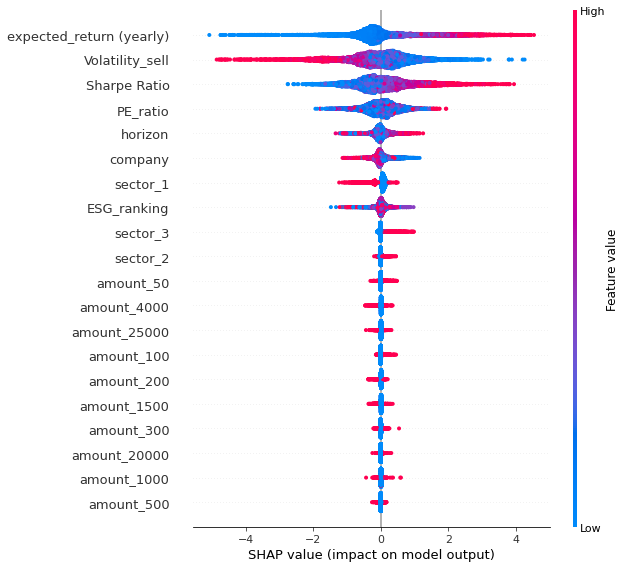

In [9]:
interpret_model(xgb)


In [5]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7203,0.7144,0.7505,0.7661,0.7583,0.4266,0.4268
1,0.7351,0.7268,0.7758,0.7720,0.7739,0.4541,0.4542
2,0.7294,0.7227,0.7618,0.7721,0.7669,0.4444,0.4444
3,0.7177,0.7094,0.7611,0.7573,0.7592,0.4183,0.4183
4,0.7325,0.7259,0.7646,0.7749,0.7697,0.4508,0.4509
5,0.7288,0.7234,0.7569,0.7743,0.7655,0.4442,0.4444
6,0.7445,0.7378,0.7765,0.7842,0.7804,0.4749,0.4749
7,0.7383,0.7308,0.7751,0.7768,0.7759,0.4614,0.4614
8,0.7165,0.7077,0.7590,0.7568,0.7579,0.4160,0.4160
9,0.7284,0.7171,0.7836,0.7595,0.7714,0.4372,0.4375


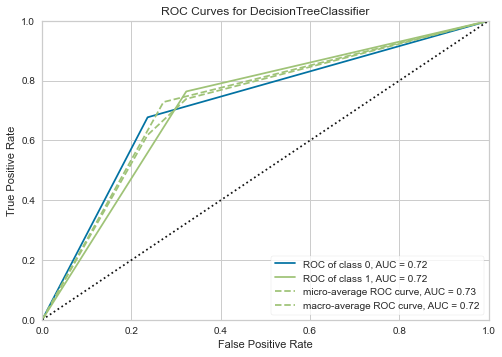

In [10]:
plot_model(dt)

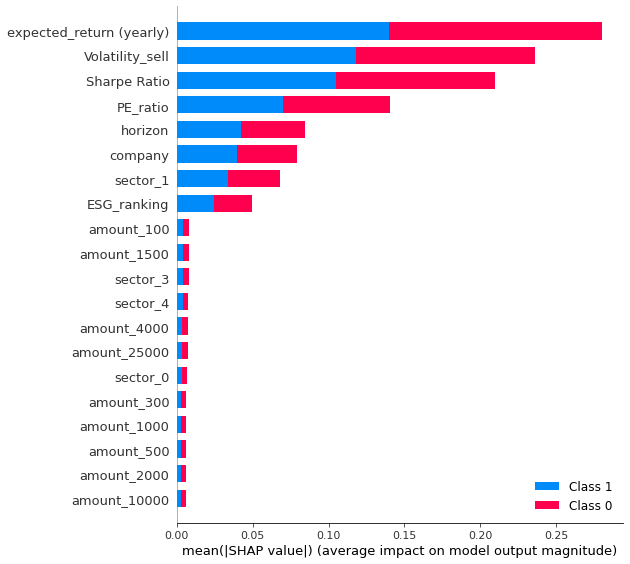

In [7]:
interpret_model(dt)

In [16]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6402,0.6667,0.7927,0.6600,0.7203,0.2279,0.2355
1,0.6616,0.7023,0.8658,0.6606,0.7494,0.2565,0.2797
2,0.6665,0.6974,0.8335,0.6735,0.7450,0.2787,0.2922
3,0.6537,0.6907,0.8320,0.6622,0.7375,0.2476,0.2618
4,0.6495,0.6892,0.8489,0.6544,0.7391,0.2319,0.2508
5,0.6594,0.7091,0.8721,0.6573,0.7496,0.2487,0.2742
6,0.6680,0.7036,0.8433,0.6723,0.7481,0.2791,0.2949
7,0.6684,0.7201,0.8623,0.6676,0.7525,0.2742,0.2956
8,0.6290,0.6676,0.7871,0.6512,0.7127,0.2022,0.2095
9,0.6524,0.6997,0.8791,0.6499,0.7473,0.2289,0.2574


In [17]:
final_dt = finalize_model(tuned_dt)
final_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1768, splitter='best')

In [14]:
!pip install graphviz
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-py3-none-any.whl size=52495 sha256=c915088609272c4321c2d1bfad130185c69724b94685a4f6e598578e173c16e3
  Stored in directory: c:\users\imanr\appdata\local\pip\cache\wheels\f9\a4\31\ab1a600f601467c4551c288c34c41beaf8d06fe9d6b8a818f9
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612248 sha256=246ee3512a35e673a7176ae3e6b22ea88cb7361a0bfce2a93b317f1d48f4be23
  Stored in directory: c:\users\imanr\appdata\local\pip\cache\wheels\ea\21\84\970b03913d0d6a96ef51c34c878add0de9e4ecbb7c764ea21f
Successfully built dtreeviz pyspark


In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
from dtreeviz.trees import *

In [21]:
graph_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1768, splitter='best')

In [22]:
X=df_to_ml.drop('investment',1)
y=df_to_ml['investment']

In [23]:
model_dt = graph_dt.fit(X,y)

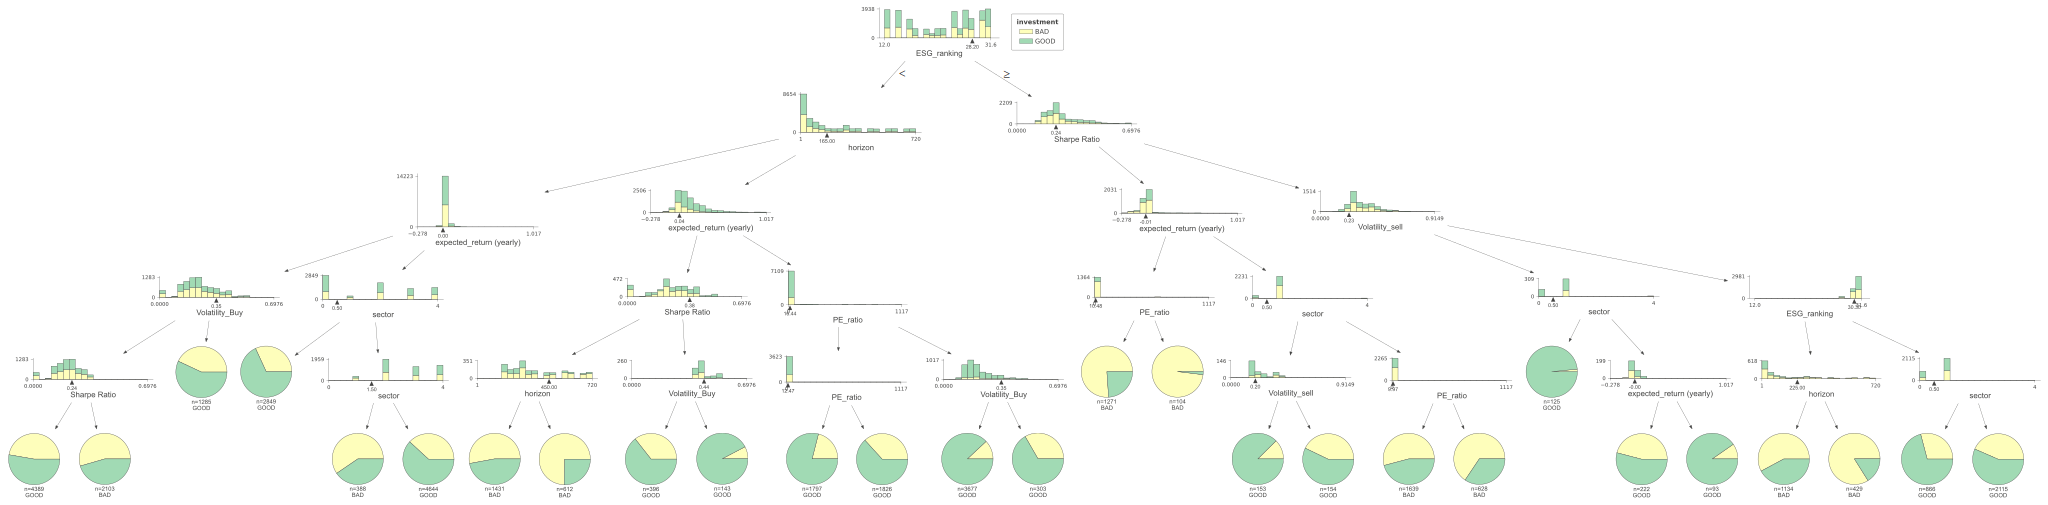

In [24]:
viz = dtreeviz(model_dt, X, y,
                target_name="investment",
                feature_names=['company','sector','horizon','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking'],
                class_names=["BAD", "GOOD"])
viz.save('decision_tree_5.svg')
viz

In [11]:
best = automl()

In [12]:
best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1768, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              validate_parameters=1, verbosity=0)